In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
cost_estimation = pd.read_csv("nigeria_electrical_installation_projects_100k.csv")
cost_estimation.head(50)

,project_id,state,building_type,floor_area_m2,rooms,lighting_points,socket_points,switch_points,cable_length_m,conduit_length_m,labour_type,material_cost,labour_cost,total_project_cost
0,1,Abuja,Commercial,646,15,14,38,16,1352,535,Skilled,1613280.0,2296572.00,3909852
1,2,Kaduna,Residential,58,13,37,41,62,461,620,Semi-skilled,990350.0,235259.00,1225609
2,3,Anambra,Residential,90,16,75,66,10,107,216,Skilled,701103.6,427618.44,1128722
3,4,Rivers,Commercial,154,8,64,134,26,766,265,Skilled,1518542.0,700787.84,2219329
4,5,Abuja,Residential,164,7,56,137,24,853,86,Skilled,1472124.0,812641.20,2284765
5,6,Anambra,Residential,577,12,15,42,19,803,914,Skilled,1301756.4,1910858.04,3212614
6,7,Anambra,Residential,641,20,40,92,31,894,280,Skilled,1281204.0,2072539.44,3353743
7,8,Osun,Commercial,950,18,53,33,69,1056,103,Semi-skilled,1098067.0,1892845.55,2990912
8,9,Rivers,Residential,102,15,63,23,44,492,127,Skilled,895313.2,541830.04,1437143
9,10,Oyo,Industrial,634,4,78,113,30,292,740,Skilled,1224000.0,1982369.00,3206369


In [3]:
cost_estimation.describe()

,project_id,floor_area_m2,rooms,lighting_points,socket_points,switch_points,cable_length_m,conduit_length_m,material_cost,labour_cost,total_project_cost
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05
mean,50000.500000,619.871450,12.539730,42.362130,78.463280,37.332310,779.250350,619.999290,1.325895e+06,1.767395e+06,3.093290e+06
std,28867.657797,333.610174,6.927183,21.297315,41.003713,18.523508,415.747227,334.681545,3.856064e+05,9.451625e+05,1.038280e+06
min,1.000000,40.000000,1.000000,6.000000,8.000000,6.000000,60.000000,40.000000,1.461111e+05,1.317441e+05,4.794720e+05
25%,25000.750000,332.000000,7.000000,24.000000,43.000000,21.000000,420.000000,329.000000,1.048352e+06,9.784881e+05,2.281752e+06
50%,50000.500000,620.000000,13.000000,42.000000,78.000000,37.000000,779.000000,621.000000,1.316190e+06,1.711752e+06,3.030550e+06
75%,75000.250000,907.000000,19.000000,61.000000,114.000000,53.000000,1139.000000,909.000000,1.589613e+06,2.450184e+06,3.830474e+06
max,100000.000000,1199.000000,24.000000,79.000000,149.000000,69.000000,1499.000000,1199.000000,2.849450e+06,4.448534e+06,7.053915e+06


In [4]:
cost_estimation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   project_id          100000 non-null  int64  
 1   state               100000 non-null  object 
 2   building_type       100000 non-null  object 
 3   floor_area_m2       100000 non-null  int64  
 4   rooms               100000 non-null  int64  
 5   lighting_points     100000 non-null  int64  
 6   socket_points       100000 non-null  int64  
 7   switch_points       100000 non-null  int64  
 8   cable_length_m      100000 non-null  int64  
 9   conduit_length_m    100000 non-null  int64  
 10  labour_type         100000 non-null  object 
 11  material_cost       100000 non-null  float64
 12  labour_cost         100000 non-null  float64
 13  total_project_cost  100000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 10.7+ MB


In [5]:
cost_estimation.isnull().sum()

project_id            0
state                 0
building_type         0
floor_area_m2         0
rooms                 0
lighting_points       0
socket_points         0
switch_points         0
cable_length_m        0
conduit_length_m      0
labour_type           0
material_cost         0
labour_cost           0
total_project_cost    0
dtype: int64

In [6]:
cost_estimation["state"].value_counts()

state
Imo        6026
Kano       5997
Enugu      5947
Osun       5934
Ondo       5928
Edo        5923
Kaduna     5919
Delta      5896
Plateau    5883
Ogun       5868
Rivers     5864
Lagos      5859
Ekiti      5852
Abuja      5833
Anambra    5775
Oyo        5749
Abia       5747
Name: count, dtype: int64

In [7]:
cost_estimation['building_type'].value_counts(normalize=True)

building_type
Residential    0.59883
Commercial     0.25030
Industrial     0.15087
Name: proportion, dtype: float64

In [8]:
cost_estimation['labour_type'].value_counts()

labour_type
Skilled         64890
Semi-skilled    35110
Name: count, dtype: int64

In [9]:
cost_estimation.groupby('state')['total_project_cost'].mean().sort_values(ascending=False)

state
Lagos      3.697499e+06
Abuja      3.558155e+06
Rivers     3.493890e+06
Delta      3.355976e+06
Anambra    3.185802e+06
Edo        3.124730e+06
Ogun       3.117061e+06
Enugu      3.022588e+06
Oyo        2.960449e+06
Kaduna     2.949334e+06
Imo        2.946433e+06
Abia       2.906238e+06
Kano       2.904140e+06
Ondo       2.897064e+06
Plateau    2.888032e+06
Osun       2.828631e+06
Ekiti      2.762158e+06
Name: total_project_cost, dtype: float64

In [10]:
cost_estimation[['floor_area_m2', 'total_project_cost']].corr()

,floor_area_m2,total_project_cost
floor_area_m2,1.000000,0.845215
total_project_cost,0.845215,1.000000


## Data Preprocessing 
    1. Data preprocessing prepares the dataset for machine learning by:
    2. Converting categorical variables to numerical form
    3. Separating features and target variable
    4. Scaling numerical values
    5. Splitting the data into training and testing sets

In [11]:
cost_estimation

,project_id,state,building_type,floor_area_m2,rooms,lighting_points,socket_points,switch_points,cable_length_m,conduit_length_m,labour_type,material_cost,labour_cost,total_project_cost
0,1,Abuja,Commercial,646,15,14,38,16,1352,535,Skilled,1613280.0,2296572.00,3909852
1,2,Kaduna,Residential,58,13,37,41,62,461,620,Semi-skilled,990350.0,235259.00,1225609
2,3,Anambra,Residential,90,16,75,66,10,107,216,Skilled,701103.6,427618.44,1128722
3,4,Rivers,Commercial,154,8,64,134,26,766,265,Skilled,1518542.0,700787.84,2219329
4,5,Abuja,Residential,164,7,56,137,24,853,86,Skilled,1472124.0,812641.20,2284765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Anambra,Residential,872,2,29,91,38,1439,1011,Skilled,2044839.6,2752115.40,4796955
99996,99997,Edo,Industrial,338,24,61,34,58,1209,300,Semi-skilled,1434877.5,779474.85,2214352
99997,99998,Plateau,Residential,1099,10,68,33,11,1336,332,Semi-skilled,1351636.8,2185049.16,3536685
99998,99999,Abuja,Residential,501,15,14,113,30,468,1085,Skilled,1552560.0,1905280.80,3457840


In [12]:
Y = cost_estimation['total_project_cost']
X = cost_estimation.drop(columns=['total_project_cost', 'project_id'])

In [13]:
X

,state,building_type,floor_area_m2,rooms,lighting_points,socket_points,switch_points,cable_length_m,conduit_length_m,labour_type,material_cost,labour_cost
0,Abuja,Commercial,646,15,14,38,16,1352,535,Skilled,1613280.0,2296572.00
1,Kaduna,Residential,58,13,37,41,62,461,620,Semi-skilled,990350.0,235259.00
2,Anambra,Residential,90,16,75,66,10,107,216,Skilled,701103.6,427618.44
3,Rivers,Commercial,154,8,64,134,26,766,265,Skilled,1518542.0,700787.84
4,Abuja,Residential,164,7,56,137,24,853,86,Skilled,1472124.0,812641.20
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Anambra,Residential,872,2,29,91,38,1439,1011,Skilled,2044839.6,2752115.40
99996,Edo,Industrial,338,24,61,34,58,1209,300,Semi-skilled,1434877.5,779474.85
99997,Plateau,Residential,1099,10,68,33,11,1336,332,Semi-skilled,1351636.8,2185049.16
99998,Abuja,Residential,501,15,14,113,30,468,1085,Skilled,1552560.0,1905280.80


In [14]:
Y

0        3909852
1        1225609
2        1128722
3        2219329
4        2284765
          ...   
99995    4796955
99996    2214352
99997    3536685
99998    3457840
99999    2307464
Name: total_project_cost, Length: 100000, dtype: int64

In [15]:
cost_estimation.head()

,project_id,state,building_type,floor_area_m2,rooms,lighting_points,socket_points,switch_points,cable_length_m,conduit_length_m,labour_type,material_cost,labour_cost,total_project_cost
0,1,Abuja,Commercial,646,15,14,38,16,1352,535,Skilled,1613280.0,2296572.00,3909852
1,2,Kaduna,Residential,58,13,37,41,62,461,620,Semi-skilled,990350.0,235259.00,1225609
2,3,Anambra,Residential,90,16,75,66,10,107,216,Skilled,701103.6,427618.44,1128722
3,4,Rivers,Commercial,154,8,64,134,26,766,265,Skilled,1518542.0,700787.84,2219329
4,5,Abuja,Residential,164,7,56,137,24,853,86,Skilled,1472124.0,812641.20,2284765


### Feature Scaling

In [16]:
categorical_features = ['state', 'building_type', 'labour_type']
numerical_features = [col for col in X.columns if col not in categorical_features]

In [17]:
categorical_features

['state', 'building_type', 'labour_type']

In [18]:
numerical_features

['floor_area_m2',
 'rooms',
 'lighting_points',
 'socket_points',
 'switch_points',
 'cable_length_m',
 'conduit_length_m',
 'material_cost',
 'labour_cost']

In [19]:
X_encoded = pd.get_dummies( X,
                            columns=categorical_features,
                            drop_first=True
)


In [20]:
X_encoded

,floor_area_m2,rooms,lighting_points,socket_points,switch_points,cable_length_m,conduit_length_m,material_cost,labour_cost,state_Abuja,...,state_Lagos,state_Ogun,state_Ondo,state_Osun,state_Oyo,state_Plateau,state_Rivers,building_type_Industrial,building_type_Residential,labour_type_Skilled
0,646,15,14,38,16,1352,535,1613280.0,2296572.00,True,...,False,False,False,False,False,False,False,False,False,True
1,58,13,37,41,62,461,620,990350.0,235259.00,False,...,False,False,False,False,False,False,False,False,True,False
2,90,16,75,66,10,107,216,701103.6,427618.44,False,...,False,False,False,False,False,False,False,False,True,True
3,154,8,64,134,26,766,265,1518542.0,700787.84,False,...,False,False,False,False,False,False,True,False,False,True
4,164,7,56,137,24,853,86,1472124.0,812641.20,True,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,872,2,29,91,38,1439,1011,2044839.6,2752115.40,False,...,False,False,False,False,False,False,False,False,True,True
99996,338,24,61,34,58,1209,300,1434877.5,779474.85,False,...,False,False,False,False,False,False,False,True,False,False
99997,1099,10,68,33,11,1336,332,1351636.8,2185049.16,False,...,False,False,False,False,False,True,False,False,True,False
99998,501,15,14,113,30,468,1085,1552560.0,1905280.80,True,...,False,False,False,False,False,False,False,False,True,True


### Train–Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split( X_encoded,
                                                     Y,
                                                     test_size=0.2,
                                                     random_state=42
)

In [23]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (80000, 28)
Testing set size: (20000, 28)


## MODEL TRAINING

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#### Train Model 1: Linear Regression

In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
Y_pred_lr = lr_model.predict(X_test)
print(Y_pred_lr)

[3027441.47962469 1990636.0042259  1988620.00685088 ... 3085129.12503118
 3002744.11780043 2537548.39418706]


#### Train Model 2: Random Forest Regressor

In [27]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
Y_pred_rf = rf_model.predict(X_test)
print(Y_pred_rf)

[3025014.29 1990430.71 1987308.26 ... 3086048.11 3000894.2  2536544.17]


#### Train Model 3: XGBoost Regressor

In [29]:
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

xgb_model.fit(X_train, Y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [30]:
Y_pred_xgb = xgb_model.predict(X_test)
print(Y_pred_xgb)

[3.0092742e+06 1.9985631e+06 1.9747605e+06 ... 3.1228488e+06 3.0158168e+06
 2.5247988e+06]


## Evaluate All Models

In [31]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [32]:
lr_metrics = evaluate_model(Y_test, Y_pred_lr)
rf_metrics = evaluate_model(Y_test, Y_pred_rf)
xgb_metrics = evaluate_model(Y_test, Y_pred_xgb)

In [33]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE (₦)": [lr_metrics[0], rf_metrics[0], xgb_metrics[0]],
    "RMSE (₦)": [lr_metrics[1], rf_metrics[1], xgb_metrics[1]],
    "R² Score": [lr_metrics[2], rf_metrics[2], xgb_metrics[2]]
})

In [34]:
results

,Model,MAE (₦),RMSE (₦),R² Score
0,Linear Regression,0.203086,0.258966,1.000000
1,Random Forest,3359.807667,6346.505503,0.999963
2,XGBoost,16826.845703,21683.162869,0.999562


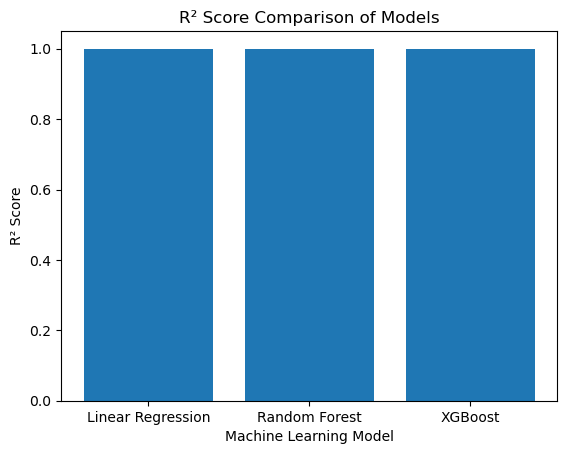

In [35]:

plt.figure()
plt.bar(results["Model"], results["R² Score"])
plt.title("R² Score Comparison of Models")
plt.xlabel("Machine Learning Model")
plt.ylabel("R² Score")
plt.show()


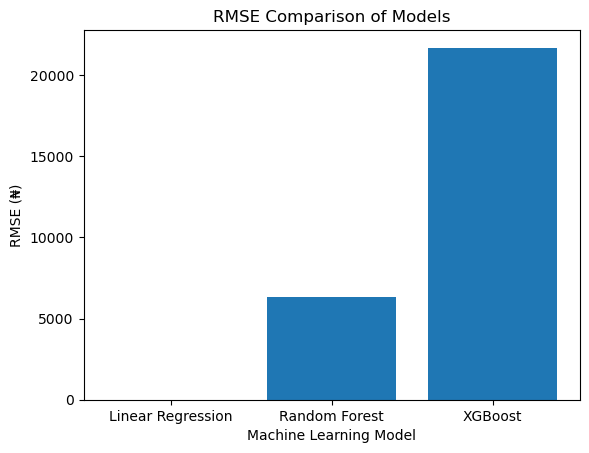

In [36]:
plt.figure()
plt.bar(results["Model"], results["RMSE (₦)"])
plt.title("RMSE Comparison of Models")
plt.xlabel("Machine Learning Model")
plt.ylabel("RMSE (₦)")
plt.show()


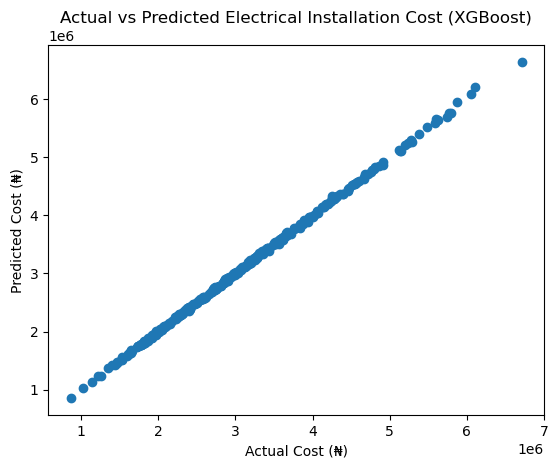

In [37]:
sample = np.random.choice(len(Y_test), 300, replace=False)

plt.figure()
plt.scatter(Y_test.iloc[sample], Y_pred_xgb[sample])
plt.xlabel("Actual Cost (₦)", )
plt.ylabel("Predicted Cost (₦)")
plt.title("Actual vs Predicted Electrical Installation Cost (XGBoost)")
plt.show()

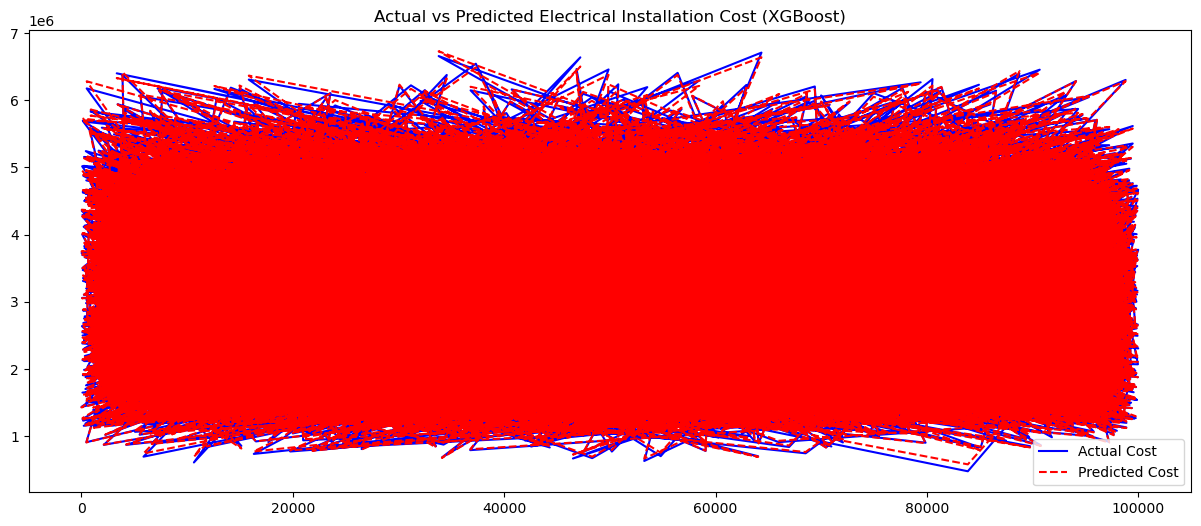

In [38]:
plt.figure(figsize = (15,6))
plt.plot(Y_test.index, Y_test, label = "Actual Cost", color = "Blue")
plt.plot(Y_test.index, Y_pred_xgb, label = "Predicted Cost", color = "Red", linestyle = "--")
plt.title("Actual vs Predicted Electrical Installation Cost (XGBoost)")
plt.legend()

plt.show()

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
importance = xgb_model.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)


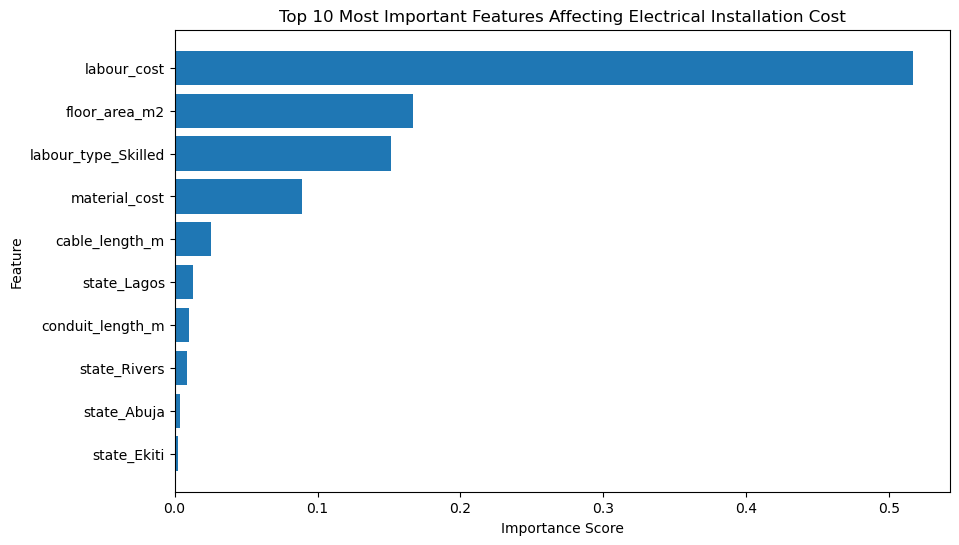

In [40]:
plt.figure(figsize=(10,6))
plt.barh(
    feature_importance_df["Feature"][:10],
    feature_importance_df["Importance"][:10]
)
plt.gca().invert_yaxis()
plt.title("Top 10 Most Important Features Affecting Electrical Installation Cost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [41]:
import pickle

# Save trained XGBoost model
import pickle

pickle.dump(xgb_model, open("cost_estimation_model.pkl", "wb"))
pickle.dump(X_encoded.columns.tolist(), open("feature_columns.pkl", "wb"))

